In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Set path to your working directory
file_path = '/Users/carlolasi/Desktop/DATA PROJECT/2021 PGA Tour Filtered Stats.csv'

# Load the dataset
pga_data = pd.read_csv(file_path)

# Display the first few rows to understand the data
pga_data.head()


,PLAYER NAME,ROUNDS---sg: approach the green---APPROACH THE GREEN,AVERAGE---sg: approach the green---APPROACH THE GREEN,TOTAL SG:APP---sg: approach the green---APPROACH THE GREEN,MEASURED ROUNDS---sg: approach the green---APPROACH THE GREEN,%---greens in regulation percentage---APPROACH THE GREEN,GREENS HIT---greens in regulation percentage---APPROACH THE GREEN,# HOLES---greens in regulation percentage---APPROACH THE GREEN,RELATIVE/PAR---greens in regulation percentage---APPROACH THE GREEN,AVG---average distance of birdie putts made---PUTTING,...,AVG---proximity to hole---APPROACH THE GREEN,TOTAL DISTANCE (FEET)---proximity to hole---APPROACH THE GREEN,# OF ATTEMPTS---proximity to hole---APPROACH THE GREEN,GIR RANK---proximity to hole---APPROACH THE GREEN,%---gir percentage from other than fairway---APPROACH THE GREEN,GREENS HIT---gir percentage from other than fairway---APPROACH THE GREEN,# OF HOLES---gir percentage from other than fairway---APPROACH THE GREEN,%---gir percentage from fairway---APPROACH THE GREEN,GREENS HIT---gir percentage from fairway---APPROACH THE GREEN,# OF HOLES---gir percentage from fairway---APPROACH THE GREEN
0,Collin Morikawa,83,1.170,77.191,66,70.80,994,1404,-0.31,"8' 3""",...,"33' 9""",39755.333,1177,1 Under,54.22,180,332,80.13,609,760
1,Paul Casey,75,0.895,51.920,58,68.83,892,1296,-0.28,"8' 2""",...,"34' 0""",35040.833,1030,1 Under,54.76,207,378,78.46,488,622
2,Justin Thomas,87,0.887,60.283,68,67.79,1025,1512,-0.35,"8' 1""",...,"35' 3""",42651.917,1210,1 Under,51.25,266,519,82.08,536,653
3,Keegan Bradley,90,0.856,66.749,78,69.96,1083,1548,-0.27,"8' 9""",...,"35' 5""",49318.000,1391,1 Under,52.03,218,419,80.87,630,779
4,Daniel Berger,87,0.834,60.915,73,70.50,1066,1512,-0.31,"9' 10""",...,"35' 3""",46191.500,1309,2 Under,56.16,228,406,79.61,613,770


In [2]:
# Check for missing values
pga_data.isnull().sum()

# Clean up column names by replacing spaces with underscores for easier access
pga_data.columns = pga_data.columns.str.replace(' ', '_')

# Drop any columns that may be irrelevant or contain too many missing values (modify based on inspection)
pga_data_cleaned = pga_data.dropna(axis=1, how='all')  # Drops columns with all missing values

# Drop rows with missing player names (if any)
pga_data_cleaned = pga_data_cleaned.dropna(subset=['PLAYER_NAME'])

# Check the structure of the cleaned data
pga_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Columns: 191 entries, PLAYER_NAME to #_OF_HOLES---gir_percentage_from_fairway---APPROACH_THE_GREEN
dtypes: float64(64), int64(110), object(17)
memory usage: 292.6+ KB


In [6]:
# Display the column names to check for any discrepancies
pga_data_cleaned.columns



Index(['PLAYER_NAME', 'ROUNDS---sg:_approach_the_green---APPROACH_THE_GREEN',
       'AVERAGE---sg:_approach_the_green---APPROACH_THE_GREEN',
       'TOTAL_SG:APP---sg:_approach_the_green---APPROACH_THE_GREEN',
       'MEASURED_ROUNDS---sg:_approach_the_green---APPROACH_THE_GREEN',
       '%---greens_in_regulation_percentage---APPROACH_THE_GREEN',
       'GREENS_HIT---greens_in_regulation_percentage---APPROACH_THE_GREEN',
       '#_HOLES---greens_in_regulation_percentage---APPROACH_THE_GREEN',
       'RELATIVE/PAR---greens_in_regulation_percentage---APPROACH_THE_GREEN',
       'AVG---average_distance_of_birdie_putts_made---PUTTING',
       ...
       'AVG---proximity_to_hole---APPROACH_THE_GREEN',
       'TOTAL_DISTANCE_(FEET)---proximity_to_hole---APPROACH_THE_GREEN',
       '#_OF_ATTEMPTS---proximity_to_hole---APPROACH_THE_GREEN',
       'GIR_RANK---proximity_to_hole---APPROACH_THE_GREEN',
       '%---gir_percentage_from_other_than_fairway---APPROACH_THE_GREEN',
       'GREENS_HIT---

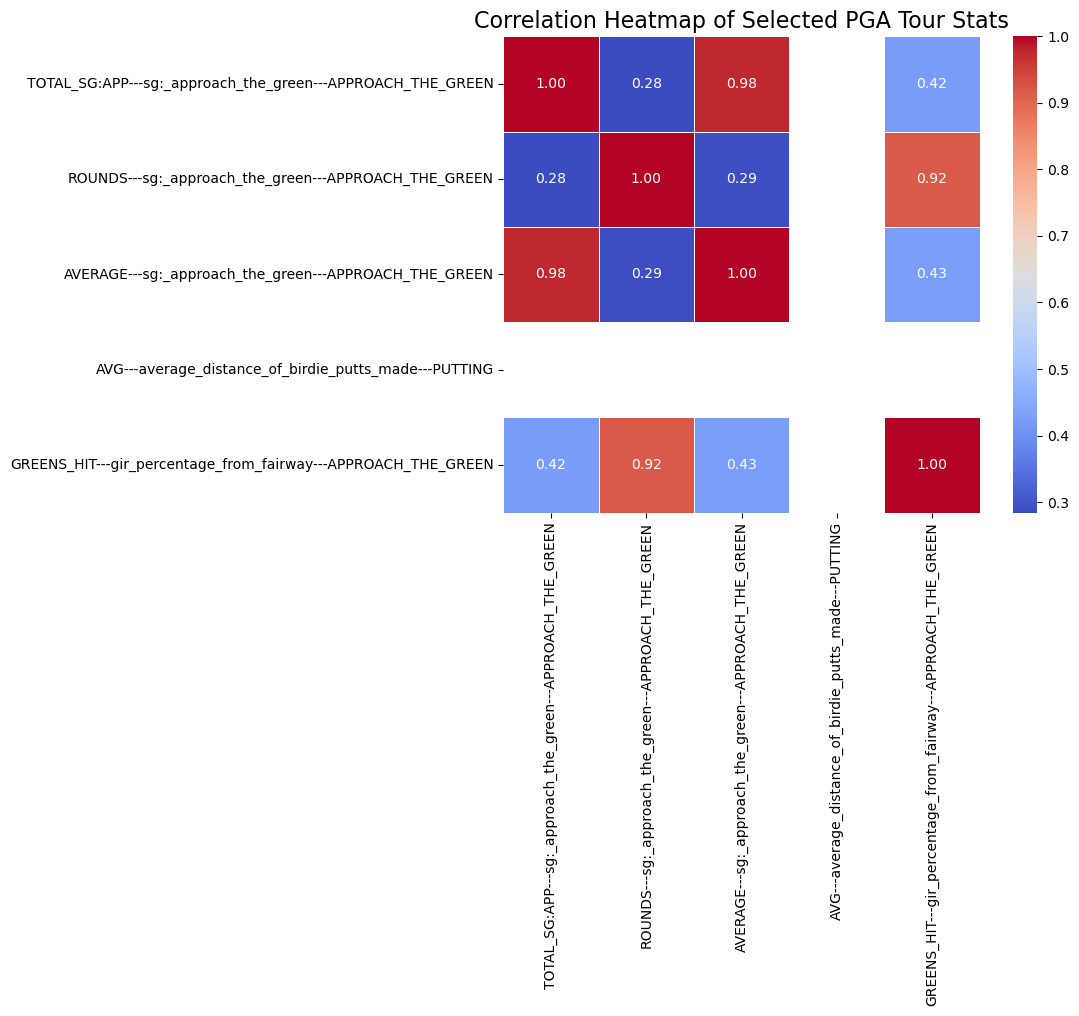

In [8]:
# Convert relevant columns to numeric, forcing errors to NaN
numeric_data_filtered = pga_data_cleaned[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with all NaN values (if any)
numeric_data_filtered = numeric_data_filtered.dropna(how='all')

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create a correlation heatmap with improved formatting
sns.heatmap(numeric_data_filtered.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)

# Set a title and adjust the layout
plt.title('Correlation Heatmap of Selected PGA Tour Stats', fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
# Feature Engineering Example: Create strokes gained per round feature
pga_data_cleaned['SG_per_round'] = pga_data_cleaned['TOTAL_SG:APP---sg:_approach_the_green---APPROACH_THE_GREEN'] / pga_data_cleaned['ROUNDS---sg:_approach_the_green---APPROACH_THE_GREEN']

# Example: Create a percentage change feature for performance improvement (optional)
pga_data_cleaned['Performance_Delta'] = pga_data_cleaned['SG_per_round'].pct_change()

# View the new features
pga_data_cleaned[['PLAYER_NAME', 'SG_per_round', 'Performance_Delta']].head()


,PLAYER_NAME,SG_per_round,Performance_Delta
0,Collin Morikawa,0.930012,NaN
1,Paul Casey,0.692267,-0.255637
2,Justin Thomas,0.692908,0.000926
3,Keegan Bradley,0.741656,0.070352
4,Daniel Berger,0.700172,-0.055933


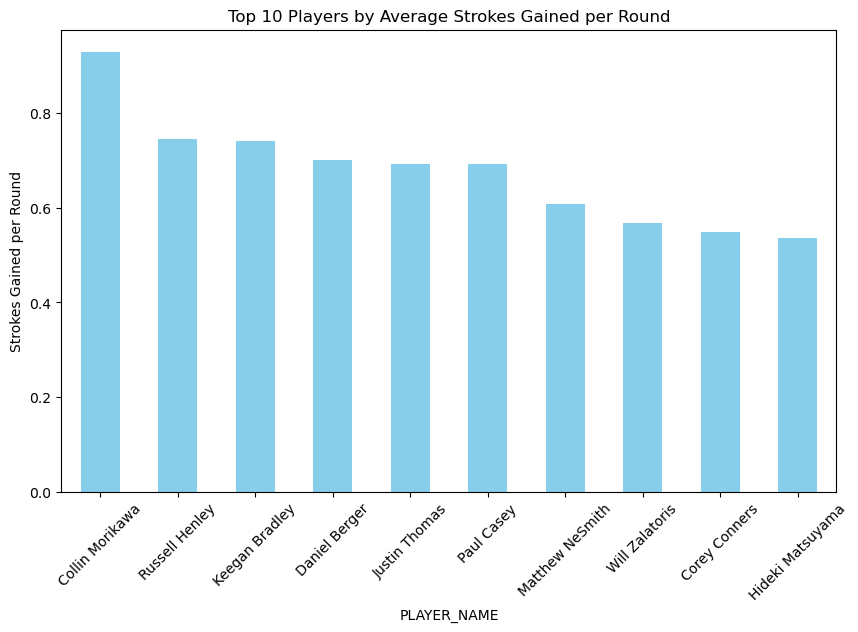

In [13]:
# Visualization: Top-performing players by strokes gained per round
top_players = pga_data_cleaned.groupby('PLAYER_NAME')['SG_per_round'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_players.plot(kind='bar', color='skyblue')
plt.title('Top 10 Players by Average Strokes Gained per Round')
plt.ylabel('Strokes Gained per Round')
plt.xticks(rotation=45)
plt.show()


In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Step 1: Select relevant features and target
features = [
    'ROUNDS---sg:_approach_the_green---APPROACH_THE_GREEN', 
    'GREENS_HIT---gir_percentage_from_fairway---APPROACH_THE_GREEN',
    'AVG---average_distance_of_birdie_putts_made---PUTTING', 
    'TOTAL_SG:APP---sg:_approach_the_green---APPROACH_THE_GREEN'
]
target = 'SG_per_round'

In [26]:
# Step 2: Clean the data
# Drop rows with missing values in the selected columns
player_data_cleaned = pga_data_cleaned.dropna(subset=features + [target])

In [27]:
# Select the features and target
X = player_data_cleaned[features]
y = player_data_cleaned[target]

In [28]:
# Convert to numeric, forcing errors to NaN, and drop NaN rows
X_cleaned = X.apply(pd.to_numeric, errors='coerce').dropna()
y_cleaned = y[X_cleaned.index]

In [30]:
# Check the first few rows of the original feature dataset
print(X.head())


   ROUNDS---sg:_approach_the_green---APPROACH_THE_GREEN  \
0                                                 83      
1                                                 75      
2                                                 87      
3                                                 90      
4                                                 87      

   GREENS_HIT---gir_percentage_from_fairway---APPROACH_THE_GREEN  \
0                                                609               
1                                                488               
2                                                536               
3                                                630               
4                                                613               

  AVG---average_distance_of_birdie_putts_made---PUTTING  \
0                                              8' 3"      
1                                              8' 2"      
2                                              8' 1"      


In [31]:
import re

# Function to convert feet and inches to decimal
def feet_inches_to_decimal(value):
    # Regular expression to capture feet and inches
    match = re.match(r"(\d+)' (\d+)\"", value)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return feet + inches / 12
    else:
        # Return NaN if the value is not in the expected format
        return np.nan


In [34]:
import re
import numpy as np

# Function to convert feet and inches to decimal
def feet_inches_to_decimal(value):
    # Check if the value is already numeric or NaN
    if isinstance(value, (int, float)) or pd.isna(value):
        return value
    # Regular expression to capture feet and inches
    match = re.match(r"(\d+)' (\d+)\"", value)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return feet + inches / 12
    else:
        # Return NaN if the value is not in the expected format
        return np.nan


In [35]:
# Apply the conversion function using .loc to avoid the SettingWithCopyWarning
X.loc[:, 'AVG---average_distance_of_birdie_putts_made---PUTTING'] = X['AVG---average_distance_of_birdie_putts_made---PUTTING'].apply(feet_inches_to_decimal)

# Check if the conversion worked
print(X['AVG---average_distance_of_birdie_putts_made---PUTTING'].head())


0    8.250000
1    8.166667
2    8.083333
3    8.750000
4    9.833333
Name: AVG---average_distance_of_birdie_putts_made---PUTTING, dtype: float64


In [36]:
# Drop rows with missing values in the selected columns
X_cleaned = X.apply(pd.to_numeric, errors='coerce').dropna()

# Ensure the target variable (y) has no missing values corresponding to dropped rows
y_cleaned = y[X_cleaned.index]

# Check how many rows remain after cleaning
print(f"Number of remaining rows: {len(X_cleaned)}")


Number of remaining rows: 196


In [37]:
from sklearn.preprocessing import StandardScaler

# Scale the cleaned features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)


In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0017004081941079403
R-squared: 0.9746596737668265


In [40]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(model, X_scaled, y_cleaned, cv=5, scoring='neg_mean_squared_error')

# Calculate the average of the cross-validation scores
avg_cv_score = -cv_scores.mean()
print(f'Average Cross-Validation MSE: {avg_cv_score}')


Average Cross-Validation MSE: 0.004393243183715504


In [41]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R-squared: {r2_ridge}')


Ridge Regression Mean Squared Error: 0.00164087891811004
Ridge Regression R-squared: 0.9755468085615413


In [42]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Split polynomial features into training and test sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_cleaned, test_size=0.2, random_state=42)

# Train the Linear Regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')


Polynomial Regression Mean Squared Error: 6.945688655652387e-05
Polynomial Regression R-squared: 0.9989649190291005


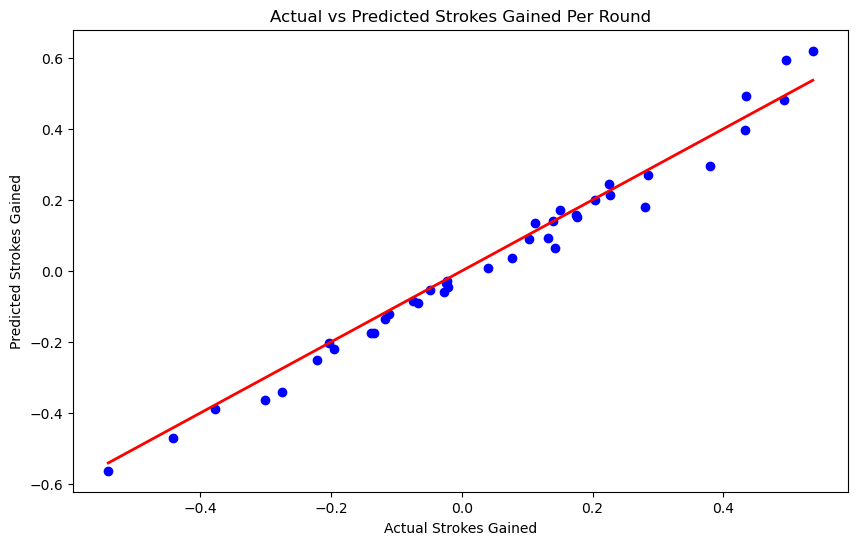

In [43]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Strokes Gained Per Round')
plt.xlabel('Actual Strokes Gained')
plt.ylabel('Predicted Strokes Gained')
plt.show()
